In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_moodle_data(id):
    
    with open('token.json') as json_data:
        token_json = json.load(json_data)
        
    domainname = 'https://ead.puc-rio.br'
    token = token_json[0]['token']
    functionname='core_group_get_course_groups'
    serverurl = domainname + '/webservice/rest/server.php'+'?wstoken='+token+'&wsfunction='+functionname+'&moodlewsrestformat=json'
    grupos = requests.post(serverurl, data = {'courseid':id})
    return grupos.json()
    
def get_files(file):
    file = pd.read_csv(file)
    return filtring(file)

def filtring(df):
    return df[(df["Nome do evento"] == "Membro removido do grupo")]

def get_group_name(df,json):
    turma=[]
    for i in df['Descrição']:
        for j in range(0,len(json)):
            if(int(i[-7:-2]) == json[j]['id'] ):
                turma.append(json[j]['name'])
    df.insert(9, column='Turma', value=turma)
    df = df.drop_duplicates(subset='Usuário afetado',keep='first')
    df = course_type(df)
    return(df)

def course_type(df):
    course_type = []
    for turma in df['Turma']:
        if((turma.startswith('ED1')) or (turma=='1CA') or (len(turma) > 6)):
            course_type.append('EAD')
        else:
            course_type.append("Presencial")
    df.insert(10,column='Tipo',value=course_type)
    return df

In [3]:
courses = {'fil_2017_1':{'id':16358,'file':'logs_FIL1000_2017.1.csv'},
          'fil_2017_2':{'id':21060,'file':'logs_FIL1000_2017.2.csv'},
          'fil_2018_1':{'id':23570,'file':'logs_FIL1000_2018.1.csv'},
          'fil_2018_2':{'id':25995,'file':'logs_FIL1000_2018.2.csv'}}

fil_2017_1 = get_files(courses['fil_2017_1']['file'])
fil_2017_2 = get_files(courses['fil_2017_2']['file'])
fil_2018_1 = get_files(courses['fil_2018_1']['file'])
fil_2018_2 = get_files(courses['fil_2018_2']['file'])

fil_2017_1_json = get_moodle_data(courses['fil_2017_1']['id'])
fil_2017_2_json = get_moodle_data(courses['fil_2017_2']['id'])
fil_2018_1_json = get_moodle_data(courses['fil_2018_1']['id'])
fil_2018_2_json = get_moodle_data(courses['fil_2018_2']['id'])

In [4]:
fil_2017_1 = get_group_name(fil_2017_1,fil_2017_1_json)
fil_2017_2 = get_group_name(fil_2017_2,fil_2017_2_json)
fil_2018_1 = get_group_name(fil_2018_1,fil_2018_1_json)
fil_2018_2 = get_group_name(fil_2018_2,fil_2018_2_json)

In [ ]:
fil_2018_2

# 2017.1

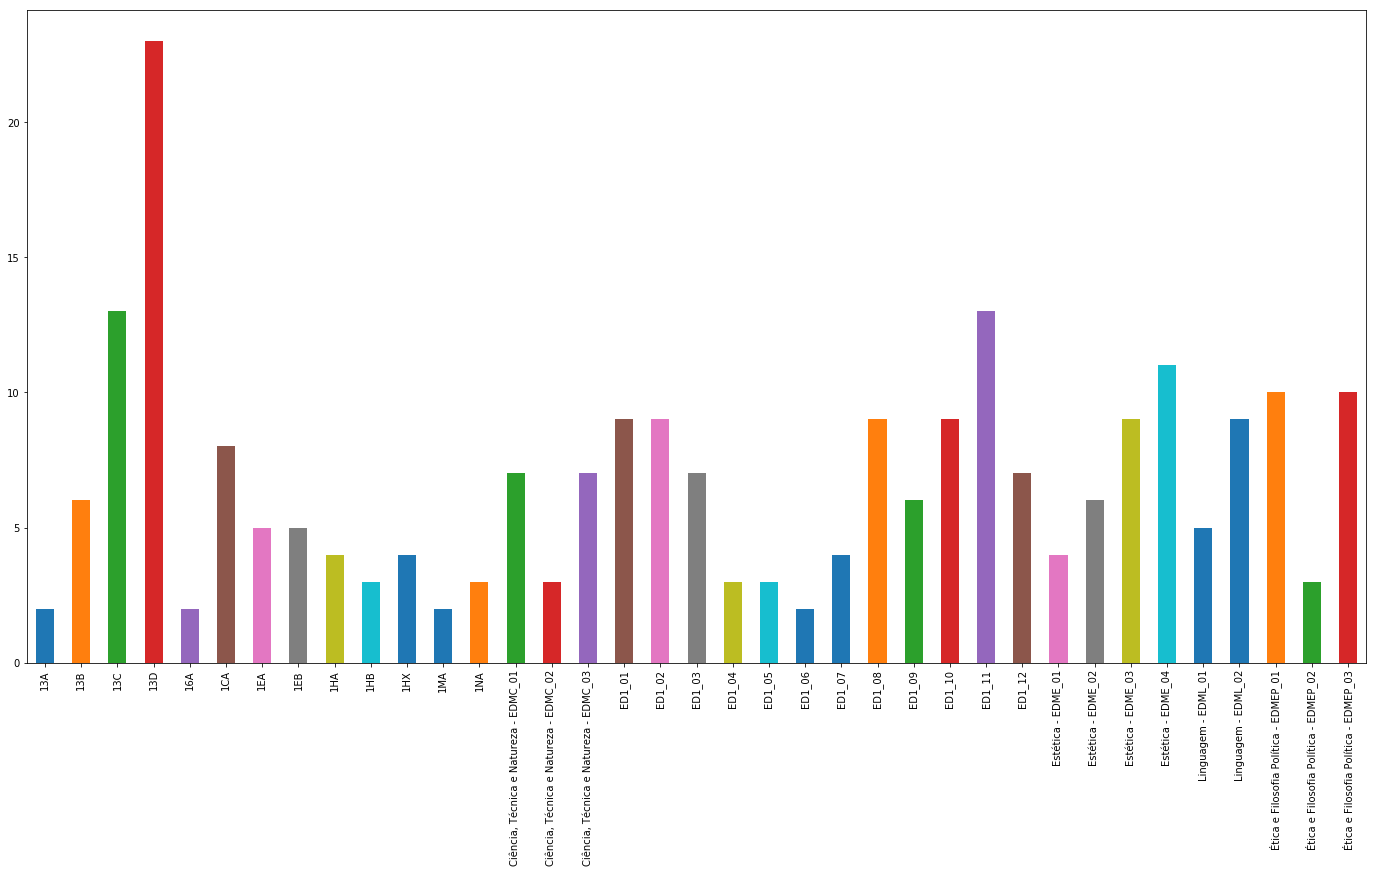

In [5]:
fil_2017_1['Turma'].value_counts().sort_index().plot.bar(figsize=(24, 12));

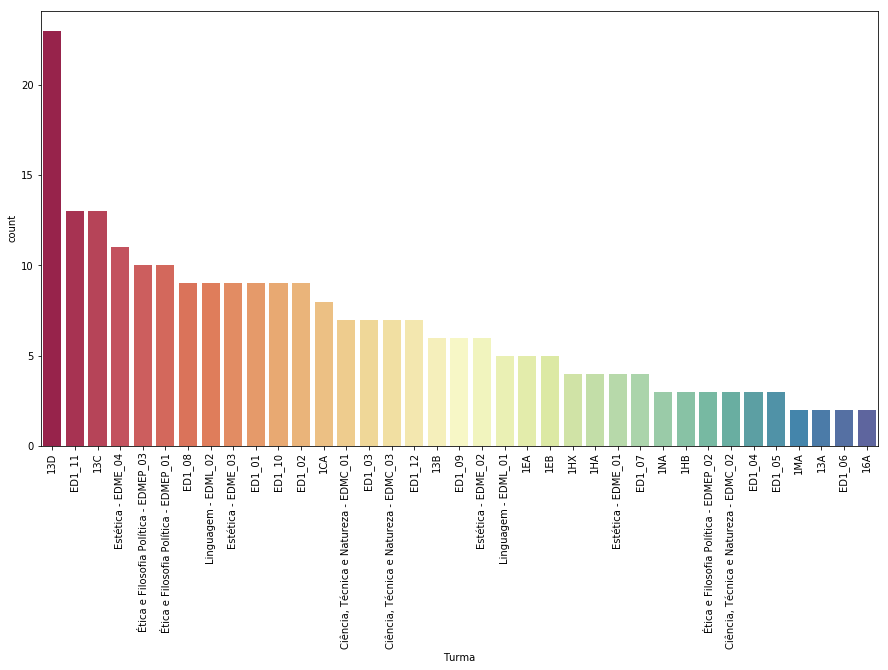

In [6]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2017_1['Turma'],order=fil_2017_1['Turma'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [7]:
print(fil_2017_1['Turma'].value_counts())


13D                                      23
ED1_11                                   13
13C                                      13
Estética - EDME_04                       11
Ética e Filosofia Política - EDMEP_03    10
Ética e Filosofia Política - EDMEP_01    10
ED1_08                                    9
Linguagem - EDML_02                       9
Estética - EDME_03                        9
ED1_01                                    9
ED1_10                                    9
ED1_02                                    9
1CA                                       8
Ciência, Técnica e Natureza - EDMC_01     7
ED1_03                                    7
Ciência, Técnica e Natureza - EDMC_03     7
ED1_12                                    7
13B                                       6
ED1_09                                    6
Estética - EDME_02                        6
Linguagem - EDML_01                       5
1EA                                       5
1EB                             

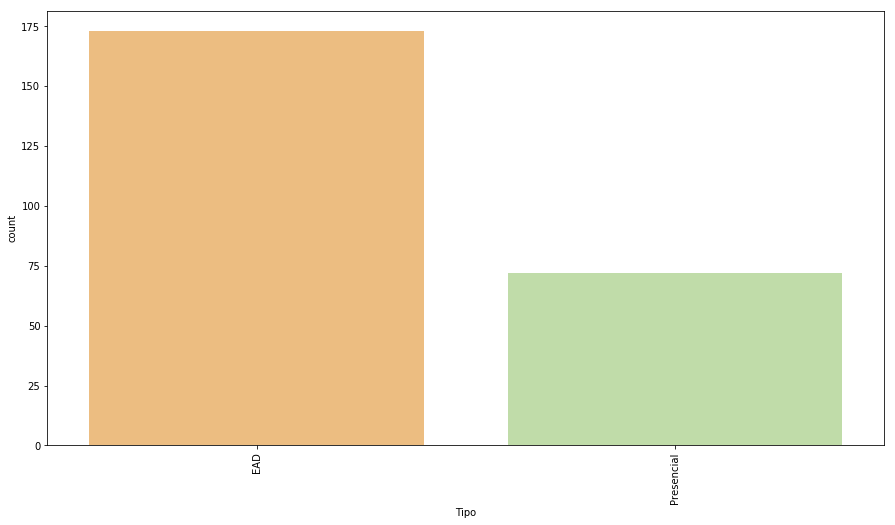

In [8]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2017_1['Tipo'],order=fil_2017_1['Tipo'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [9]:
fil_2017_1['Tipo'].value_counts()

EAD           173
Presencial     72
Name: Tipo, dtype: int64

# 2017.2

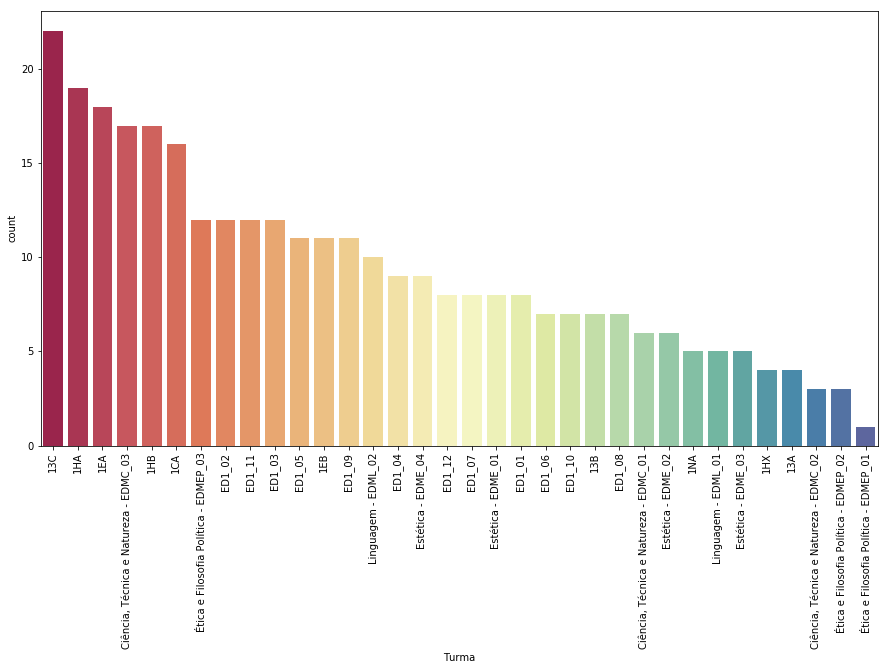

In [10]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2017_2['Turma'],order=fil_2017_2['Turma'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [11]:
print(fil_2017_2['Turma'].value_counts())

13C                                      22
1HA                                      19
1EA                                      18
Ciência, Técnica e Natureza - EDMC_03    17
1HB                                      17
1CA                                      16
Ética e Filosofia Política - EDMEP_03    12
ED1_02                                   12
ED1_11                                   12
ED1_03                                   12
ED1_05                                   11
1EB                                      11
ED1_09                                   11
Linguagem - EDML_02                      10
ED1_04                                    9
Estética - EDME_04                        9
ED1_12                                    8
ED1_07                                    8
Estética - EDME_01                        8
ED1_01                                    8
ED1_06                                    7
ED1_10                                    7
13B                             

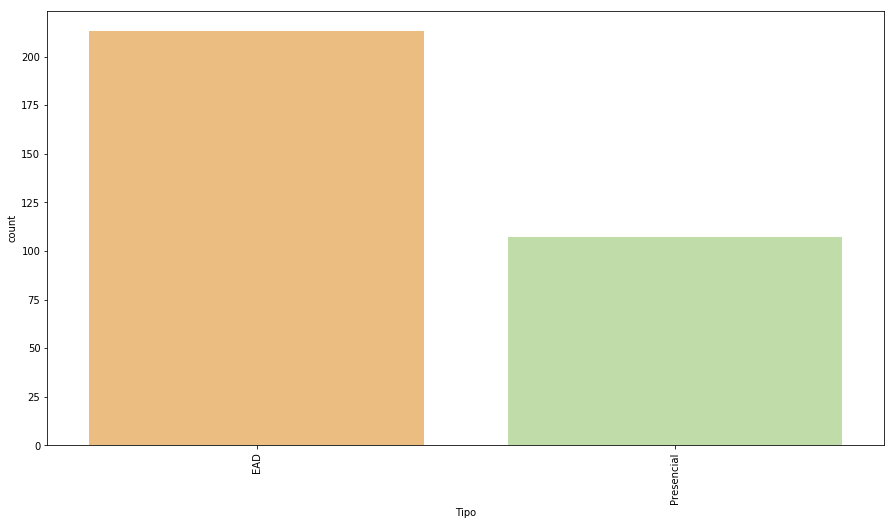

In [12]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2017_2['Tipo'],order=fil_2017_2['Tipo'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [13]:
fil_2017_2['Tipo'].value_counts()

EAD           213
Presencial    107
Name: Tipo, dtype: int64

# 2018.1

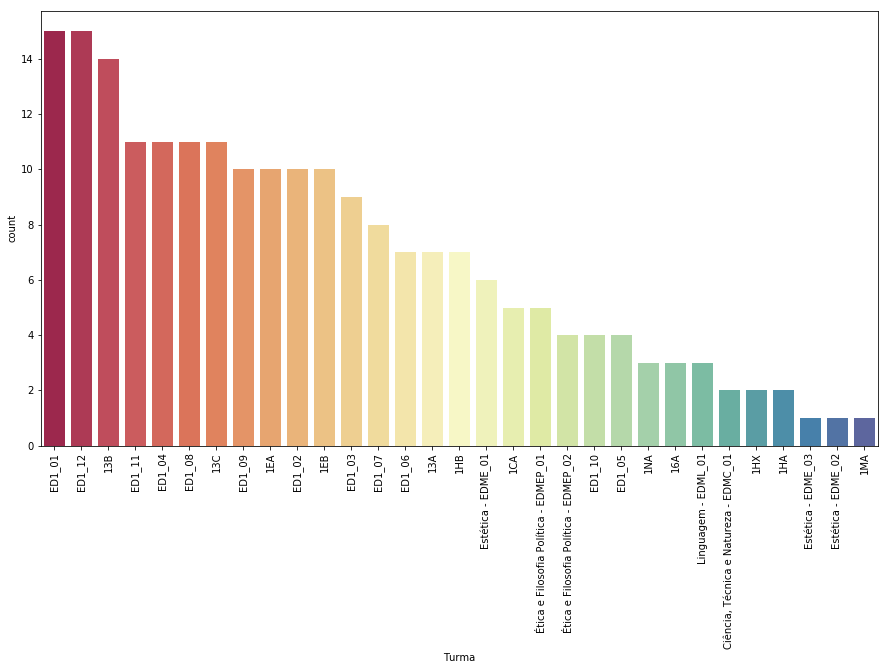

In [14]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2018_1['Turma'],order=fil_2018_1['Turma'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [15]:
print(fil_2018_1['Turma'].value_counts())

ED1_01                                   15
ED1_12                                   15
13B                                      14
ED1_11                                   11
ED1_04                                   11
ED1_08                                   11
13C                                      11
ED1_09                                   10
1EA                                      10
ED1_02                                   10
1EB                                      10
ED1_03                                    9
ED1_07                                    8
ED1_06                                    7
13A                                       7
1HB                                       7
Estética - EDME_01                        6
1CA                                       5
Ética e Filosofia Política - EDMEP_01     5
Ética e Filosofia Política - EDMEP_02     4
ED1_10                                    4
ED1_05                                    4
1NA                             

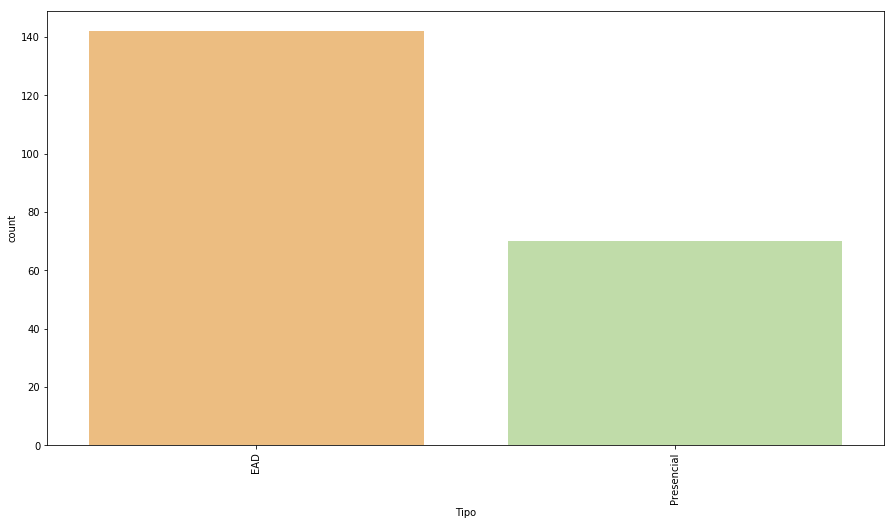

In [16]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2018_1['Tipo'],order=fil_2018_1['Tipo'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [17]:
print(fil_2018_1['Tipo'].value_counts())

EAD           142
Presencial     70
Name: Tipo, dtype: int64


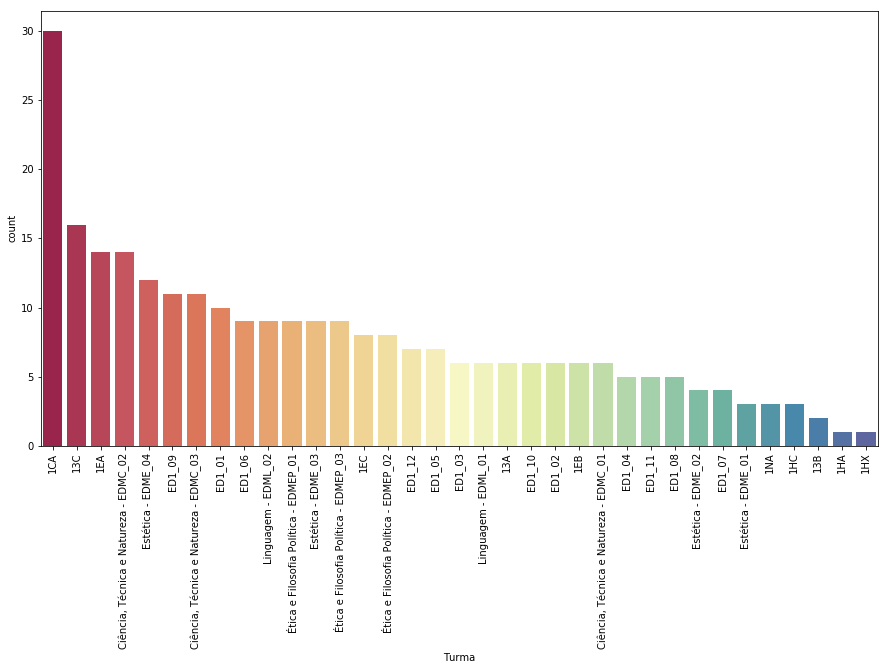

In [18]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2018_2['Turma'],order=fil_2018_2['Turma'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [19]:
print(fil_2018_2['Turma'].value_counts())

1CA                                      30
13C                                      16
1EA                                      14
Ciência, Técnica e Natureza - EDMC_02    14
Estética - EDME_04                       12
ED1_09                                   11
Ciência, Técnica e Natureza - EDMC_03    11
ED1_01                                   10
ED1_06                                    9
Linguagem - EDML_02                       9
Ética e Filosofia Política - EDMEP_01     9
Estética - EDME_03                        9
Ética e Filosofia Política - EDMEP_03     9
1EC                                       8
Ética e Filosofia Política - EDMEP_02     8
ED1_12                                    7
ED1_05                                    7
ED1_03                                    6
Linguagem - EDML_01                       6
13A                                       6
ED1_10                                    6
ED1_02                                    6
1EB                             

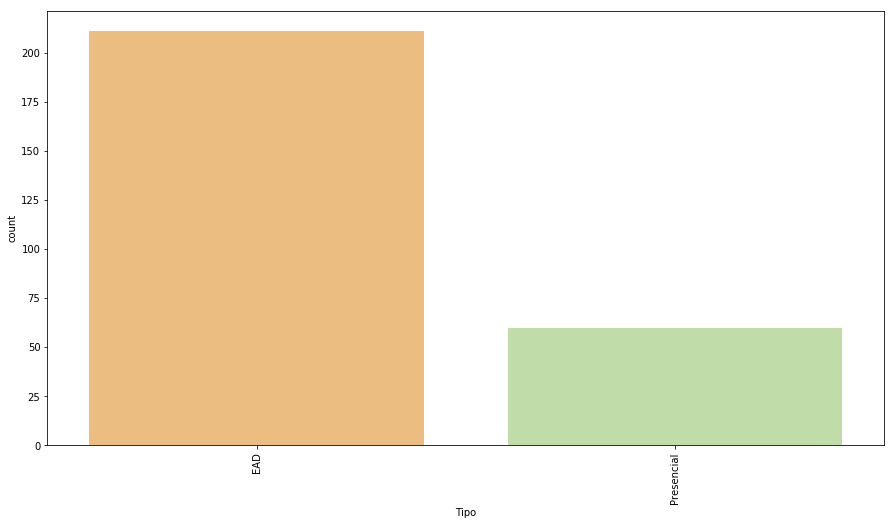

In [20]:
plt.figure(figsize=(15,8))
fig = sns.countplot(fil_2018_2['Tipo'],order=fil_2018_2['Tipo'].value_counts().index,palette='Spectral');
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_figure;

In [21]:
print(fil_2018_2['Tipo'].value_counts())

EAD           211
Presencial     60
Name: Tipo, dtype: int64
